<a href="https://colab.research.google.com/github/squadOito/soulcodead2/blob/renato%2Fnotebook/notebook/notebooks/fator_capacidade_mwh_2015_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Alunos: Adriano Kim, José Aurelio, Marcos Paulo, Paulo Vitorino e Renato Costa e Wesley Luiz**

Professores: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro

#**Perguntas de negócio**:

1)

---



# Base de Dados Informações gerais

<br>O Operador Nacional do Sistema Elétrico (ONS) é o órgão responsável pela coordenação e controle da operação das instalações de geração e transmissão de energia elétrica no Sistema Interligado Nacional (SIN) e pelo planejamento da operação dos sistemas isolados do país, sob a fiscalização e regulação da Agência Nacional de Energia Elétrica (Aneel).

Fator de capacidade de usinas e conjuntos de usinas eólicos e solares despachados pelo ONS em base horária. O fator de capacidade é obtido pela relação entre a geração e a capacidade instalada das usinas.

Os dados presentes são dos anos de 01/01/2015 a 01/08/2023

********* REVISAR Obs.: descrever o PORQUE nao alteramos tanto o dicionario!!!


<br> Fontes:

https://dados.ons.org.br/dataset/fator-capacidade-2

https://www.ons.org.br/paginas/sobre-o-ons/o-que-e-ons


## **Dicionário de dados**

Obs.: descrever o PORQUE nao alteramos tanto o dicionario!!!

* id_subsistema - Identificador do subsistema
* nom_subsistema - Nome do subsistema
* id_estado - Sigla do Estado
* nom_estado - Nome do Estado
* nom_pontoconexao - Nome do ponto de conexão da usina/conjunto
* nom_localizacao - Localização da usina/conjunto, disponível apenas região Nordeste
* val_latitudesecoletora  - Latitude da usina/conjunto
* val_longitudesecoletora - Longitude da usina/conjunto
* val_latitudepontoconexao - Latitude do Ponto de Conexão
* val_longitudepontoconexao - Longitude do Ponto de Conexão
* nom_modalidadeoperacao - Modalidade de operação
* nom_tipousina - Tipo da usina
* nom_usina_conjunto - Nome da usina/conjunto
* din_instante  - Data e hora
* id_ons - Identificador da usina ou conjunto no ONS
* ceg - Código Único do Empreendimento de Geração (CEG), estabelecido pela ANEEL
* val_geracaoprogramada - Geração Programada, em MWmed(relação entre a eletricidade gerada em MWh e o tempo de funcionamento das instalações).
* val_geracaoverificada - Geração Verificada, em MWmed(relação entre a eletricidade gerada em MWh e o tempo de funcionamento das instalações).
* val_capacidadeinstalada - Capacidade instalada, em MW(MegaWatts)
* val_fatorcapacidade - Fator de capacidade, obtida pela relação entre a geração e a capacidade instalada


Fonte:
*  https://dados.ons.org.br/dataset/fator-capacidade-2/resource/142f9c3b-4feb-492e-a0b4-bce97f059fca

# Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

## Instalações de Bibliotecas
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [ ]:
!pip install gcsfs

In [ ]:
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Importando Bibliotecas pré instaladas
import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage
from google.colab import drive

In [ ]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

In [ ]:
# Conexão com a conta do Google Cloud
serviceAccount = '/content/projeto-final-ad2-e8-ae566c3a2c2b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8')
bucket.blob('FATOR_CAPACIDADE_2015a2023_bruto.csv')
path = 'gs://projeto-final-ad2-e8/dados/brutos/csv/FATOR_CAPACIDADE_2015a2023_bruto.csv'


In [ ]:
# Leitura e configuração dos arquivos extraidos
df_fator_cap = pd.read_csv(path,
                 sep=';',
                 encoding='UTF-8')

## Pré Análise

In [ ]:
# Visualização geral
df_fator_cap

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,ceg,din_instante,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
0,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-14.208409,-42.636807,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Alvorada,CJU_BAALV,-,2015-01-01 00:00:00,35.5,36.092073,38.40,0.939898
1,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Araçás,CJU_BAARA,-,2015-01-01 00:00:00,29.0,65.187220,107.22,0.607976
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.186292,-42.493356,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Caetité 123,CJU_BACAE,-,2015-01-01 00:00:00,23.0,36.777401,90.00,0.408638
3,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-13.916364,-42.616201,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Curva dos Ventos,CJU_BACVN,-,2015-01-01 00:00:00,11.5,19.176730,54.05,0.354796
4,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-14.172142,-42.598414,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Guirapá,CJU_BAGRP,-,2015-01-01 00:00:00,27.5,34.876650,52.80,0.660543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622775,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,TRES IRMAOS - 138 kV (A),NaN,-20.790444,-51.529266,-20.656389,-51.482778,Conjunto de Usinas,Solar,Conj. Castilho,CJU_SPCST3,-,2023-08-01 23:00:00,0.0,0.137000,210.70,0.000650
8622776,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,DRACENA - 138 kV (A),NaN,-21.450214,-51.587776,-21.457222,-51.526667,Conjunto de Usinas,Solar,Conj. Dracena,CJU_SPUFD,-,2023-08-01 23:00:00,0.0,0.000000,81.00,0.000000
8622777,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,GETULINA - 138 kV (A),NaN,-21.893809,-49.863684,-21.855464,-49.838358,Conjunto de Usinas,Solar,Conj. Guaimbê,CJU_SPCUFG,-,2023-08-01 23:00:00,0.0,0.000000,150.00,0.000000
8622778,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,AGUA VERMELHA - 138 kV (A),NaN,-20.195849,-50.032683,-19.867222,-50.350000,Conjunto de Usinas,Solar,Conj. Pedranópolis,CJU_SPPED,-,2023-08-01 23:00:00,0.0,0.000000,90.36,0.000000


In [ ]:
# Visualização de forma aleatoria
df_fator_cap.sample(3)

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,ceg,din_instante,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
2305352,NE,Nordeste,RN,RIO GRANDE DO NORTE,TOUROS - 69 kV (A),Litoral,-5.151389,-35.665000,-5.189627,-35.652566,Conjunto de Usinas,Eólica,Conj. Carnaúbas,CJU_RNCNB,-,2018-09-11 21:00:00,84.0,79.199,108.0,0.733324
2588643,NE,Nordeste,RN,RIO GRANDE DO NORTE,POLO GUAMARE - 138 kV (A),Litoral,-5.172742,-36.359399,NaN,NaN,Conjunto de Usinas,Eólica,Conj. Mangue Seco,CJU_RNMSC,-,2018-12-24 12:00:00,23.5,9.155,104.0,0.088029
5672075,NE,Nordeste,RN,RIO GRANDE DO NORTE,LAGOA NOVA II - 69 kV (A),Interior,-6.045274,-36.536954,-6.060491,-36.524827,Conjunto de Usinas,Eólica,Conj. Calango 1,CJU_RNCA1,-,2021-09-07 23:00:00,48.5,58.751,60.0,0.979183


In [ ]:
# Tamanho total de (linhas , colunas)
df_fator_cap.shape

(8622780, 20)

In [ ]:
# Todos os tipos de dados presentes
df_fator_cap.dtypes

id_subsistema                 object
nom_subsistema                object
id_estado                     object
nom_estado                    object
nom_pontoconexao              object
nom_localizacao               object
val_latitudesecoletora       float64
val_longitudesecoletora      float64
val_latitudepontoconexao     float64
val_longitudepontoconexao    float64
nom_modalidadeoperacao        object
nom_tipousina                 object
nom_usina_conjunto            object
id_ons                        object
ceg                           object
din_instante                  object
val_geracaoprogramada        float64
val_geracaoverificada        float64
val_capacidadeinstalada      float64
val_fatorcapacidade          float64
dtype: object

In [ ]:
# Contagem de observações para cada coluna
df_fator_cap.count()

id_subsistema                8622780
nom_subsistema               8622780
id_estado                    8622780
nom_estado                   8622780
nom_pontoconexao             8553255
nom_localizacao              7420235
val_latitudesecoletora       8610132
val_longitudesecoletora      8610132
val_latitudepontoconexao     8485411
val_longitudepontoconexao    8485411
nom_modalidadeoperacao       8622780
nom_tipousina                8622780
nom_usina_conjunto           8622780
id_ons                       8622780
ceg                          8622780
din_instante                 8622780
val_geracaoprogramada        8278267
val_geracaoverificada        8622780
val_capacidadeinstalada      8578982
val_fatorcapacidade          8622780
dtype: int64

In [ ]:
# Informações detalhadas
df_fator_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622780 entries, 0 to 8622779
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id_subsistema              object 
 1   nom_subsistema             object 
 2   id_estado                  object 
 3   nom_estado                 object 
 4   nom_pontoconexao           object 
 5   nom_localizacao            object 
 6   val_latitudesecoletora     float64
 7   val_longitudesecoletora    float64
 8   val_latitudepontoconexao   float64
 9   val_longitudepontoconexao  float64
 10  nom_modalidadeoperacao     object 
 11  nom_tipousina              object 
 12  nom_usina_conjunto         object 
 13  id_ons                     object 
 14  ceg                        object 
 15  din_instante               object 
 16  val_geracaoprogramada      float64
 17  val_geracaoverificada      float64
 18  val_capacidadeinstalada    float64
 19  val_fatorcapacidade        float64
dtypes:

In [ ]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamente para todos os atributos

for coluna in df_fator_cap:
    valor = (df_fator_cap[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
            Valores únicos para o atributo id_subsistema:             
----------------------------------------------------------------------

['NE' 'S' 'N' 'SE']

----------------------------------------------------------------------
----------------------------------------------------------------------
            Valores únicos para o atributo nom_subsistema:            
----------------------------------------------------------------------

['Nordeste' 'Sul' 'Norte' 'Sudeste/Centro-Oeste']

----------------------------------------------------------------------
----------------------------------------------------------------------
              Valores únicos para o atributo id_estado:               
----------------------------------------------------------------------

['BA' 'CE' 'RN' 'RS' 'SC' 'PE' 'PI' 'MA' 'MG' 'SP' 'PB']

----------------------------------------------------------------------
---------------

# Transformação
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

## Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [ ]:
# Verificar se há valores duplicados
df_fator_cap.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
8622775    False
8622776    False
8622777    False
8622778    False
8622779    False
Length: 8622780, dtype: bool

In [ ]:
# Verificar se há valores nulos/ausentes
df_fator_cap.isnull().sum()

id_subsistema                      0
nom_subsistema                     0
id_estado                          0
nom_estado                         0
nom_pontoconexao               69525
nom_localizacao              1202545
val_latitudesecoletora         12648
val_longitudesecoletora        12648
val_latitudepontoconexao      137369
val_longitudepontoconexao     137369
nom_modalidadeoperacao             0
nom_tipousina                      0
nom_usina_conjunto                 0
id_ons                             0
ceg                                0
din_instante                       0
val_geracaoprogramada         344513
val_geracaoverificada              0
val_capacidadeinstalada        43798
val_fatorcapacidade                0
dtype: int64

In [ ]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df_fator_cap.isnull().sum() / len(df_fator_cap)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,2))

id_subsistema                 0.00
nom_subsistema                0.00
id_estado                     0.00
nom_estado                    0.00
nom_pontoconexao              0.81
nom_localizacao              13.95
val_latitudesecoletora        0.15
val_longitudesecoletora       0.15
val_latitudepontoconexao      1.59
val_longitudepontoconexao     1.59
nom_modalidadeoperacao        0.00
nom_tipousina                 0.00
nom_usina_conjunto            0.00
id_ons                        0.00
ceg                           0.00
din_instante                  0.00
val_geracaoprogramada         4.00
val_geracaoverificada         0.00
val_capacidadeinstalada       0.51
val_fatorcapacidade           0.00
dtype: float64


In [ ]:
df_fator_cap_backup = df_fator_cap.copy()

## Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

### Tipagem

In [ ]:
# criando um dataset para validar a tipagem
df_data_alterada = df_fator_cap_backup.copy()

In [ ]:
# Convertendo para data e hora, preservando as horas
df_data_alterada['din_instante'] = pd.to_datetime(df_data_alterada['din_instante'], exact=False)

In [ ]:
# Verificando se foi efetivado a alteração
df_data_alterada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622780 entries, 0 to 8622779
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   id_subsistema              object        
 1   nom_subsistema             object        
 2   id_estado                  object        
 3   nom_estado                 object        
 4   nom_pontoconexao           object        
 5   nom_localizacao            object        
 6   val_latitudesecoletora     float64       
 7   val_longitudesecoletora    float64       
 8   val_latitudepontoconexao   float64       
 9   val_longitudepontoconexao  float64       
 10  nom_modalidadeoperacao     object        
 11  nom_tipousina              object        
 12  nom_usina_conjunto         object        
 13  id_ons                     object        
 14  ceg                        object        
 15  din_instante               datetime64[ns]
 16  val_geracaoprogramada      float64  

In [ ]:
# Garantindo que a tipagem não modificou a informação do registro
df_fator_cap_backup.din_instante[10000]

'2015-01-13 14:00:00'

In [ ]:
# Garantindo que a tipagem não modificou a informação do registro
df_data_alterada.din_instante[10000]

Timestamp('2015-01-13 14:00:00')

In [ ]:
# Convertendo para data e hora, preservando as horas. No dataframe de backup
df_fator_cap_backup['din_instante'] = pd.to_datetime(df_fator_cap_backup['din_instante'], exact=False)

In [ ]:
# Verificando se foi efetivado a alteração
df_fator_cap_backup.dtypes

id_subsistema                        object
nom_subsistema                       object
id_estado                            object
nom_estado                           object
nom_pontoconexao                     object
nom_localizacao                      object
val_latitudesecoletora              float64
val_longitudesecoletora             float64
val_latitudepontoconexao            float64
val_longitudepontoconexao           float64
nom_modalidadeoperacao               object
nom_tipousina                        object
nom_usina_conjunto                   object
id_ons                               object
ceg                                  object
din_instante                 datetime64[ns]
val_geracaoprogramada               float64
val_geracaoverificada               float64
val_capacidadeinstalada             float64
val_fatorcapacidade                 float64
dtype: object

## Tradução

In [ ]:
# Renomeando/Traduzindo colunas
# df.rename(columns={'coluna1':'traducao',}, inplace=True)
df_fator_cap_backup.rename(columns={'din_instante':'data'}, inplace=True)

In [ ]:
# Examinando alteração
df_fator_cap_backup.dtypes

id_subsistema                        object
nom_subsistema                       object
id_estado                            object
nom_estado                           object
nom_pontoconexao                     object
nom_localizacao                      object
val_latitudesecoletora              float64
val_longitudesecoletora             float64
val_latitudepontoconexao            float64
val_longitudepontoconexao           float64
nom_modalidadeoperacao               object
nom_tipousina                        object
nom_usina_conjunto                   object
id_ons                               object
ceg                                  object
data                         datetime64[ns]
val_geracaoprogramada               float64
val_geracaoverificada               float64
val_capacidadeinstalada             float64
val_fatorcapacidade                 float64
dtype: object

In [ ]:
# Examinando se os registros foram alterados
# pd.unique(df.traducao)

## **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [ ]:
# Verifica se há qualquer valor nulo ou nao numerico(NaN)
df_fator_cap_backup.isna().any()

id_subsistema                False
nom_subsistema               False
id_estado                    False
nom_estado                   False
nom_pontoconexao              True
nom_localizacao               True
val_latitudesecoletora        True
val_longitudesecoletora       True
val_latitudepontoconexao      True
val_longitudepontoconexao     True
nom_modalidadeoperacao       False
nom_tipousina                False
nom_usina_conjunto           False
id_ons                       False
ceg                          False
data                         False
val_geracaoprogramada         True
val_geracaoverificada        False
val_capacidadeinstalada       True
val_fatorcapacidade          False
dtype: bool

In [ ]:
# Lista das colunas a serem preenchidas
colunas_preenchimento = [
    'nom_pontoconexao',
    'nom_localizacao',
    'val_latitudesecoletora',
    'val_longitudesecoletora',
    'val_latitudepontoconexao',
    'val_longitudepontoconexao',
    'val_geracaoprogramada',
    'val_capacidadeinstalada'
]

# Loop para preenchimento de colunas com 'NA' ou 0
for coluna in colunas_preenchimento:
    if 'val_' in coluna:
        valor_preenchimento = 0
    else:
        valor_preenchimento = 'NA'
    df_fator_cap_backup[coluna].fillna(valor_preenchimento, inplace=True)

In [ ]:
# Interpola os valores na coluna e arredonda para duas casas decimais
# df_fator_cap_backup.val_capacidadeinstalada = df_fator_cap_backup.val_capacidadeinstalada.interpolate().round(2)

In [ ]:
df_fator_cap_backup.dtypes

id_subsistema                        object
nom_subsistema                       object
id_estado                            object
nom_estado                           object
nom_pontoconexao                     object
nom_localizacao                      object
val_latitudesecoletora              float64
val_longitudesecoletora             float64
val_latitudepontoconexao            float64
val_longitudepontoconexao           float64
nom_modalidadeoperacao               object
nom_tipousina                        object
nom_usina_conjunto                   object
id_ons                               object
ceg                                  object
data                         datetime64[ns]
val_geracaoprogramada               float64
val_geracaoverificada               float64
val_capacidadeinstalada             float64
val_fatorcapacidade                 float64
dtype: object

In [ ]:
df_fator_cap_backup.columns

Index(['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado',
       'nom_pontoconexao', 'nom_localizacao', 'val_latitudesecoletora',
       'val_longitudesecoletora', 'val_latitudepontoconexao',
       'val_longitudepontoconexao', 'nom_modalidadeoperacao', 'nom_tipousina',
       'nom_usina_conjunto', 'id_ons', 'ceg', 'data', 'val_geracaoprogramada',
       'val_geracaoverificada', 'val_capacidadeinstalada',
       'val_fatorcapacidade'],
      dtype='object')

In [ ]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'id_subsistema': pa.Column(pa.String),
    'nom_subsistema': pa.Column(pa.String),
    'id_estado': pa.Column(pa.String),
    'nom_estado': pa.Column(pa.String),
    'nom_pontoconexao': pa.Column(pa.String),
    'nom_localizacao': pa.Column(pa.String),
    'val_latitudesecoletora': pa.Column(pa.Float),
    'val_longitudesecoletora': pa.Column(pa.Float),
    'val_latitudepontoconexao': pa.Column(pa.Float),
    'val_longitudepontoconexao': pa.Column(pa.Float),
    'nom_modalidadeoperacao': pa.Column(pa.String),
    'nom_tipousina': pa.Column(pa.String),
    'nom_usina_conjunto': pa.Column(pa.String),
    'id_ons': pa.Column(pa.String),
    'ceg': pa.Column(pa.String),
    'data': pa.Column(pa.DateTime),
    'val_geracaoprogramada': pa.Column(pa.Float),
    'val_geracaoverificada': pa.Column(pa.Float),
    'val_capacidadeinstalada': pa.Column(pa.Float),
    'val_fatorcapacidade': pa.Column(pa.Float)
})

schema.validate(df_fator_cap_backup)

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,ceg,data,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
0,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-14.208409,-42.636807,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Alvorada,CJU_BAALV,-,2015-01-01 00:00:00,35.5,36.092073,38.40,0.939898
1,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Araçás,CJU_BAARA,-,2015-01-01 00:00:00,29.0,65.187220,107.22,0.607976
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.186292,-42.493356,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Caetité 123,CJU_BACAE,-,2015-01-01 00:00:00,23.0,36.777401,90.00,0.408638
3,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-13.916364,-42.616201,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Curva dos Ventos,CJU_BACVN,-,2015-01-01 00:00:00,11.5,19.176730,54.05,0.354796
4,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-14.172142,-42.598414,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Guirapá,CJU_BAGRP,-,2015-01-01 00:00:00,27.5,34.876650,52.80,0.660543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622775,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,TRES IRMAOS - 138 kV (A),NA,-20.790444,-51.529266,-20.656389,-51.482778,Conjunto de Usinas,Solar,Conj. Castilho,CJU_SPCST3,-,2023-08-01 23:00:00,0.0,0.137000,210.70,0.000650
8622776,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,DRACENA - 138 kV (A),NA,-21.450214,-51.587776,-21.457222,-51.526667,Conjunto de Usinas,Solar,Conj. Dracena,CJU_SPUFD,-,2023-08-01 23:00:00,0.0,0.000000,81.00,0.000000
8622777,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,GETULINA - 138 kV (A),NA,-21.893809,-49.863684,-21.855464,-49.838358,Conjunto de Usinas,Solar,Conj. Guaimbê,CJU_SPCUFG,-,2023-08-01 23:00:00,0.0,0.000000,150.00,0.000000
8622778,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,AGUA VERMELHA - 138 kV (A),NA,-20.195849,-50.032683,-19.867222,-50.350000,Conjunto de Usinas,Solar,Conj. Pedranópolis,CJU_SPPED,-,2023-08-01 23:00:00,0.0,0.000000,90.36,0.000000


In [ ]:
df_fator_cap_backup.count()

id_subsistema                8622780
nom_subsistema               8622780
id_estado                    8622780
nom_estado                   8622780
nom_pontoconexao             8622780
nom_localizacao              8622780
val_latitudesecoletora       8622780
val_longitudesecoletora      8622780
val_latitudepontoconexao     8622780
val_longitudepontoconexao    8622780
nom_modalidadeoperacao       8622780
nom_tipousina                8622780
nom_usina_conjunto           8622780
id_ons                       8622780
ceg                          8622780
data                         8622780
val_geracaoprogramada        8622780
val_geracaoverificada        8622780
val_capacidadeinstalada      8622780
val_fatorcapacidade          8622780
dtype: int64

In [ ]:
# Extraindo o ano da coluna 'data'
df_fator_cap_tratado['ano'] = df_fator_cap_tratado['data'].dt.year

# Agrupando por 'nom_subsistema' e 'ano', somando os valores e resetando o índice
df_agrupado = df_fator_cap_tratado.groupby(['nom_subsistema', 'ano'])['val_geracaoverificada'].sum().reset_index()

# Calculando o crescimento percentual em relação ao ano anterior
df_agrupado['crescimento_percentual'] = df_agrupado.groupby('nom_subsistema')['val_geracaoverificada'].pct_change() * 100

# Exibindo o DataFrame final
print(df_agrupado)

          nom_subsistema   ano  val_geracaoverificada  crescimento_percentual
0               Nordeste  2015           1.143166e+07                     NaN
1               Nordeste  2016           2.192146e+07               91.761012
2               Nordeste  2017           3.318455e+07               51.379267
3               Nordeste  2018           4.086911e+07               23.157038
4               Nordeste  2019           4.895535e+07               19.785713
5               Nordeste  2020           4.959941e+07                1.315602
6               Nordeste  2021           6.611422e+07               33.296384
7               Nordeste  2022           7.787436e+07               17.787613
8               Nordeste  2023           5.059694e+07              -35.027466
9                  Norte  2017           6.451276e+05                     NaN
10                 Norte  2018           1.033454e+06               60.193682
11                 Norte  2019           1.650591e+06           

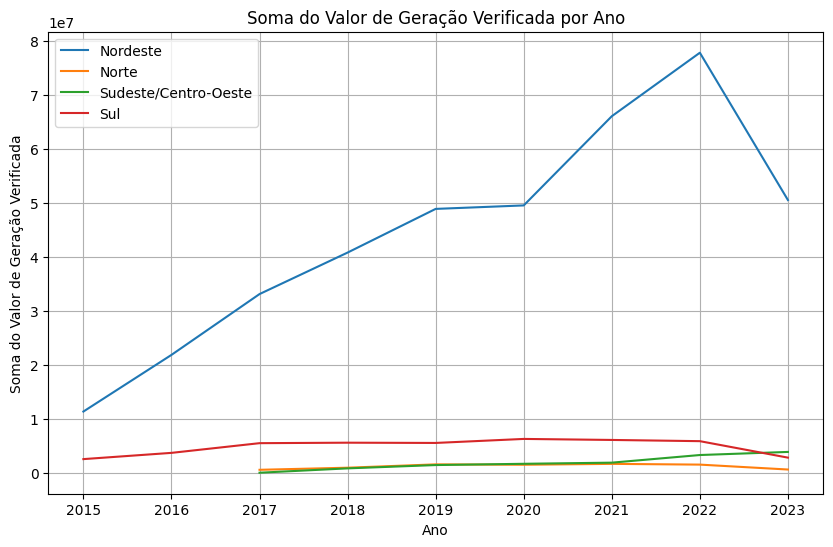

In [ ]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.figure(figsize=(10, 6))
for regiao, df_regiao in df_agrupado.groupby('nom_subsistema'):
    plt.plot(df_regiao['ano'], df_regiao['val_geracaoverificada'], label=regiao)

plt.title('Soma do Valor de Geração Verificada por Ano')
plt.xlabel('Ano')
plt.ylabel('Soma do Valor de Geração Verificada')
plt.legend()
plt.grid(True)
plt.show()

## Backup - Copia de segurança

In [ ]:
# Backup para analise
df_fator_cap_tratado = df_fator_cap_backup.copy()

# Carregamento
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [ ]:
# Upando para o Google Cloud

# df_fator_cap_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/fator_capacidade_mwh_2015_2023.csv', index=False)


# Análise exploratória de dados.
- Descrição de dados: identificação dos tipos de variáveis, dimensões dos dados, valores extremos e estatísticas descritivas.
- Visualização dos dados: criação de gráficos, tabelas e outros tipos de visualização para entender a distribuição e a relação entre as variáveis.
- Identificação de padrões: identificação de padrões, tendências, correlações e outras relações entre as variáveis.
- Testes estatísticos: aplicação de testes estatísticos para confirmar ou refutar hipóteses sobre os dados.

## Instalações de bibliotecas
bibliotecas necessárias para a análise de dados que não haviam sido importadas anteriormente.

## **Estatisticas**

In [ ]:
# Resumo de estatisticas descritivas
df_fator_cap_tratado.describe().round(2)

,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
count,8622780.00,8622780.00,8622780.00,8622780.00,8622780.00,8622780.00,8622780.00,8622780.00
mean,-10.51,-40.78,-10.48,-40.26,50.99,54.25,138.76,0.38
std,7.77,4.99,7.79,6.96,59.41,64.43,100.14,0.31
min,-33.47,-55.71,-33.47,-55.71,0.00,0.00,0.00,0.00
25%,-13.92,-42.61,-14.03,-42.63,10.50,9.67,70.00,0.10
50%,-7.96,-40.64,-8.03,-40.48,34.00,35.06,105.60,0.34
75%,-5.15,-36.58,-5.38,-36.91,68.50,73.98,183.60,0.64
max,0.00,0.00,0.00,0.00,759.50,2697.73,1020.36,12.19


In [ ]:
# Correlações de todas colunas quantitativas
df_fator_cap_tratado.corr()

,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
val_latitudesecoletora,1.000000,0.880945,0.991299,0.656412,0.017163,0.008085,-0.065237,0.048579
val_longitudesecoletora,0.880945,1.000000,0.859697,0.679027,0.009443,0.002068,-0.091826,0.071567
val_latitudepontoconexao,0.991299,0.859697,1.000000,0.731745,0.016534,0.007114,-0.070763,0.046642
val_longitudepontoconexao,0.656412,0.679027,0.731745,1.000000,0.003711,-0.003389,-0.087966,0.036743
val_geracaoprogramada,0.017163,0.009443,0.016534,0.003711,1.000000,0.880517,0.579620,0.528874
val_geracaoverificada,0.008085,0.002068,0.007114,-0.003389,0.880517,1.000000,0.568397,0.661020
val_capacidadeinstalada,-0.065237,-0.091826,-0.070763,-0.087966,0.579620,0.568397,1.000000,0.019408
val_fatorcapacidade,0.048579,0.071567,0.046642,0.036743,0.528874,0.661020,0.019408,1.000000


In [ ]:
# Distribuição de frequencia
def distfreq(dados, classes=None):
    # Verifica se o número de classes foi fornecido como parâmetro, caso
    # contrário, determina automaticamente. Se o número de dados for menor
    # ou igual a 25, define 5 classes, caso contrário, a quantidade de classes
    # será a raiz quadrada do número de de dados
    if classes is None:
        if len(dados) <= 25:
            classes = 5
        else:
            classes = round(len(dados) ** 0.5 + 0.5)
    else:
        pass

    # Ordena os dados em ordem crescente
    dados = sorted(dados)
    # Calcula a amplitude (diferença entre o maior e o menor valor)
    amplitude = max(dados) - min(dados)
    # Calcula o intervalo entre as classes
    intervalo = amplitude / classes
    # Cria uma lista para armazenar os limites dos intervalos
    intervalos = [dados[0]]
    for i in range(classes):
        intervalos.append((intervalos[i] + intervalo))

    # Imprime o cabeçalho da tabela
    print("-" * 100)
    print(f'{"Valores":^19}|{"Frequência":^19}|{"Freq. Acumulada":^19}|'
        + f'{"Frequência %":^19}|{"Freq. Acumulada %":^19}')
    print("-" * 100)

    a = 0
    b = 0

    # Laço para calcular as frequências para cada classe
    for i in range(classes):
        a = 0
        teste = f'{intervalos[i]:.2f} ---- {intervalos[i+1]:.2f}'

        # Laço para contar quantos valores estão dentro do intervalo atual
        for j in range(len(dados)):
            if dados[j] < intervalos[i + 1] + 0.000001:
                a = a + 1
            else:
                pass

        # Imprime os valores da classe atual e suas frequências
        print(f'{teste:^19}|{a - b:^19}|{a:^19}|{((a - b) / len(dados)):^19.2%}|{((a) / len(dados)):^19.2%}')

        # Atualiza o valor de b para a próxima iteração
        b = a

        # Imprime uma linha separadora
        print("-" * 100)

    # Imprime o final da tabela discriminando o total geral
    print(f'{"Total Geral":^19}|{a:^19}|{"":^19}|{"100,00%":^19}|{"":^19}')
    print("-"*100)
    return

In [ ]:
# distfreq(df.loc[df.cidade == 'Londres']['preco_total'],154)

### Filtros e agrupamentos
Criar novas variáveis com base nos dados originais para permitir uma análise mais detalhada e avançada.

In [ ]:
# Filtros, agrupamentos


# Visualização

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

# Conclusão
Resumo das principais conclusões e insights obtidos a partir da análise exploratória, sugestões para próximos passos da análise ou possíveis ações a serem tomadas.